# Clean GMU COVID-19 Data

## Load data

In [1]:
import pandas as pd

df = pd.read_excel('../data/gmu-covid.xlsx', sheet_name='merged')

pred_cols = [c for c in df.columns if c.endswith('_first')]
symp_cols = [c.replace('_first', '') for c in pred_cols]
demo_cols = ['RaceWhite', 'GenderFemale', 'Age30orMore']
igno_cols = [c for c in df.columns if c.startswith('Ignore')]

Check to make sure columns are all accounted for.

In [2]:
len(pred_cols) + len(symp_cols) + len(demo_cols) + len(igno_cols)

65

In [3]:
len(df.columns)

66

## Get symptom precedence

In general, these are the precedence of variables by type.

- demographics -> ignore -> result -> symptoms

We have some idea of the order in symptoms.

In [4]:
from itertools import groupby

s = df[pred_cols].sum().sort_values(ascending=False)
s.index = [i.replace('_first', '') for i in s.index]

tups = [(i, c) for i, c in zip(s.index, s.values)]

key = lambda tup: -tup[1]
d = {-k: [t[0] for t in list(g)] 
     for k, g in groupby(sorted(tups, key=key), key)}
s_cols = [v for _, v in d.items()]
s_cols

[['Cough'],
 ['Runnynose'],
 ['Sorethroat'],
 ['Headaches'],
 ['Fatigue'],
 ['MuscleAches'],
 ['Chills'],
 ['Diarrhea'],
 ['Difficultybreathing'],
 ['LossAppetite'],
 ['Chestpain'],
 ['ExcessSweat'],
 ['Shortnessofbreath', 'Vomiting'],
 ['AbdominalPain'],
 ['JointPain'],
 ['LossTaste'],
 ['LossSmell', 'Confusion'],
 ['LossBalance', 'Pinkeye', 'Shivering'],
 ['Wheezing'],
 ['RedRash', 'UnexplainedRash'],
 ['Numbness', 'SlurredSpeech'],
 ['Bluish'],
 ['Fever']]

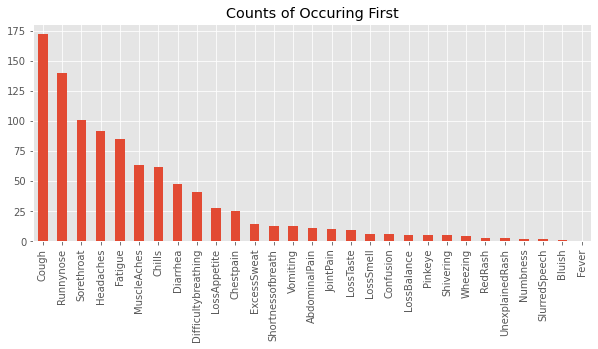

In [5]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

_ = s.plot(kind='bar', figsize=(10, 4), title='Counts of Occuring First')

In [6]:
ordering = [demo_cols] + [igno_cols] + [['TestPositive']] + s_cols
ordering

[['RaceWhite', 'GenderFemale', 'Age30orMore'],
 ['IgnoreRespSymp', 'IgnoreGastroSymp', 'IgnoreNeuroSymp', 'IgnoreInflamSymp'],
 ['TestPositive'],
 ['Cough'],
 ['Runnynose'],
 ['Sorethroat'],
 ['Headaches'],
 ['Fatigue'],
 ['MuscleAches'],
 ['Chills'],
 ['Diarrhea'],
 ['Difficultybreathing'],
 ['LossAppetite'],
 ['Chestpain'],
 ['ExcessSweat'],
 ['Shortnessofbreath', 'Vomiting'],
 ['AbdominalPain'],
 ['JointPain'],
 ['LossTaste'],
 ['LossSmell', 'Confusion'],
 ['LossBalance', 'Pinkeye', 'Shivering'],
 ['Wheezing'],
 ['RedRash', 'UnexplainedRash'],
 ['Numbness', 'SlurredSpeech'],
 ['Bluish'],
 ['Fever']]

In [7]:
sum([len(a) for a in ordering])

37

In [8]:
import json

output = {
    'ordering': ordering
}

json.dumps(output)

'{"ordering": [["RaceWhite", "GenderFemale", "Age30orMore"], ["IgnoreRespSymp", "IgnoreGastroSymp", "IgnoreNeuroSymp", "IgnoreInflamSymp"], ["TestPositive"], ["Cough"], ["Runnynose"], ["Sorethroat"], ["Headaches"], ["Fatigue"], ["MuscleAches"], ["Chills"], ["Diarrhea"], ["Difficultybreathing"], ["LossAppetite"], ["Chestpain"], ["ExcessSweat"], ["Shortnessofbreath", "Vomiting"], ["AbdominalPain"], ["JointPain"], ["LossTaste"], ["LossSmell", "Confusion"], ["LossBalance", "Pinkeye", "Shivering"], ["Wheezing"], ["RedRash", "UnexplainedRash"], ["Numbness", "SlurredSpeech"], ["Bluish"], ["Fever"]]}'

In [9]:
with open('../data/gmu-covid.json', 'w') as f:
    json.dump(output, f, indent=2)